# DS 440 Data Mining
# Lecture 18: Classification Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Getting a classification dataset

In [2]:
D = load_iris()
print(D.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(D.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = D.data
y = D.target

In [5]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (150, 4)
y shape: (150,)


## Visualizing the dataset

Considering petal width and petal length as our feature of choice. Considering just two features will help with better visualization

In [6]:
Xc = X[:,[2,3]]
print(Xc.shape)

(150, 2)


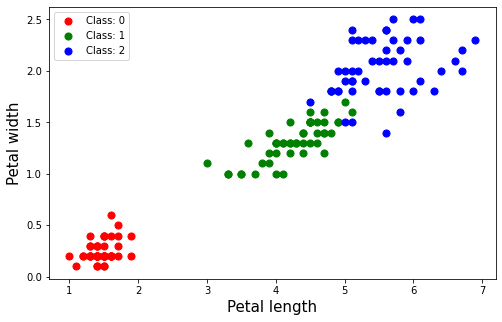

In [7]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
col = ['r','g','b']
plt.scatter(Xc[y ==0,0],Xc[y == 0,1],s = 50,color = col[0], label = 'Class: 0')
plt.scatter(Xc[y ==1,0],Xc[y == 1,1],s = 50,color = col[1], label = 'Class: 1')
plt.scatter(Xc[y ==2,0],Xc[y == 2,1],s = 50,color = col[2], label = 'Class: 2')
plt.xlabel('Petal length',size = 15)
plt.ylabel('Petal width',size = 15)
plt.legend()
plt.show()

Looking at the plot below guess the class for the two new samples denoted by black cross markers:

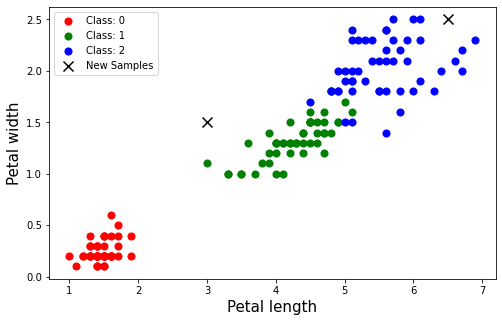

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
col = ['r','g','b']
plt.scatter(Xc[y ==0,0],Xc[y == 0,1],s = 50,color = col[0], label = 'Class: 0')
plt.scatter(Xc[y ==1,0],Xc[y == 1,1],s = 50,color = col[1], label = 'Class: 1')
plt.scatter(Xc[y ==2,0],Xc[y == 2,1],s = 50,color = col[2], label = 'Class: 2')
plt.xlabel('Petal length',size = 15)
plt.ylabel('Petal width',size = 15)
plt.scatter(6.5,2.5,s = 100,color = 'k',marker = 'x', label = 'New Samples')
plt.scatter(3,1.5,s = 100,color = 'k',marker = 'x')
plt.legend()
plt.show()

## Using Logistic Regression to classify these samples

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
clf = LogisticRegression(random_state=0).fit(Xc, y)

In [11]:
# Predicting for samples
Xpred = np.array([[6.5,2.5],[3,1.5]])
pred = clf.predict(Xpred)

In [12]:
print(f'For (6.5,2.5): class: {pred[0]}')
print(f'For (3,1.5): class: {pred[1]}')

For (6.5,2.5): class: 2
For (3,1.5): class: 1


In [13]:
clf.predict_proba(Xpred)

array([[1.81829063e-08, 1.27905943e-03, 9.98720922e-01],
       [2.70482252e-01, 7.26104333e-01, 3.41341506e-03]])

## Trying to visualize the boundary Logistic Regression Learnt
1. Predict the label for all point in the 2 dimensional grid.
2. Plot them with colors so that the boundary becomes visible

In [18]:
xx = np.linspace(1,7,60)
yy = np.linspace(0,2.6,60)
Xpred =[]
for i in xx:
    for j in yy:
        Xpred.append([i,j])
Xpred = np.array(Xpred)
pred = clf.predict(Xpred)

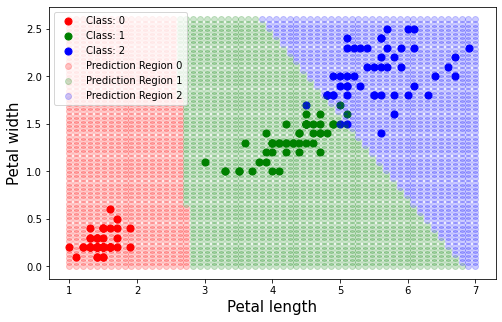

In [22]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
col = ['r','g','b']
plt.scatter(Xc[y ==0,0],Xc[y == 0,1],s = 50,color = col[0], label = 'Class: 0')
plt.scatter(Xc[y ==1,0],Xc[y == 1,1],s = 50,color = col[1], label = 'Class: 1')
plt.scatter(Xc[y ==2,0],Xc[y == 2,1],s = 50,color = col[2], label = 'Class: 2')
plt.xlabel('Petal length',size = 15)
plt.ylabel('Petal width',size = 15)

## Plotting the predictions at all points
plt.scatter(Xpred[pred == 0,0],Xpred[pred == 0,1],color = col[0], label = 'Prediction Region 0', alpha = 0.2)
plt.scatter(Xpred[pred == 1,0],Xpred[pred == 1,1],color = col[1], label = 'Prediction Region 1', alpha = 0.2)
plt.scatter(Xpred[pred == 2,0],Xpred[pred == 2,1],color = col[2], label = 'Prediction Region 2', alpha = 0.2)
plt.legend()
plt.show()